<a href="https://colab.research.google.com/github/rameshbabulakshmanan84/MLProjects/blob/master/Ex2%20-%20Phising%20Website%20with%20LR%20-%202%20parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#CellStrat - Load the phishing website dataset (this dataset has 11000+ data samples). Each sample has 30 website
#parameters and then a class label identifying it as a phishing website or not (1 or -1).

#The task is to train a Logistic Regression classifier which can detect phishing websites.

#Use 70% data for training and 30% for testing.

#Train the model using training data and then use it to predict the test data.

#Then print the count of misclassified samples in the test data prediction as well as the accuracy score of this prediction.

#Then train with only two input parameters. e.g. parameter index 5 (parameter Prefix_Suffix) and 13 (URL_of_Anchor) only out of
#30 parameters. Check accuracy on the test data again and compare the accuracy with the previous value, where it was
#trained on all the parameters.

#Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Misclassficaton error 246
Accuracy score for LR 0.9258365993367501
Accuracy score for model with 2 params nly 0.8501658124811576
[[0.04134738 0.04286917 0.04444438 ... 0.98647765 0.98697185 0.98744822]
 [0.04136944 0.042892   0.04446801 ... 0.98648507 0.986979   0.98745512]
 [0.0413915  0.04291485 0.04449165 ... 0.98649248 0.98698615 0.98746201]
 ...
 [0.04591639 0.047598   0.049338   ... 0.98786422 0.98830835 0.98873641]
 [0.04594077 0.04762322 0.0493641  ... 0.98787089 0.98831478 0.98874261]
 [0.04596516 0.04764846 0.04939021 ... 0.98787755 0.9883212  0.9887488 ]]


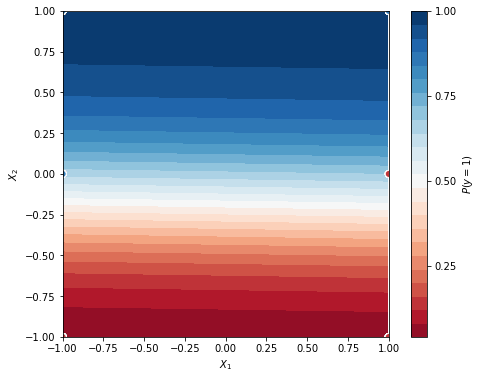

In [19]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#load the data file
df=pd.read_csv('https://raw.githubusercontent.com/rameshbabulakshmanan84/MLProjects/master/phishing.txt',sep=',')

#data analysis 
#df.shape

#check for nan values
#print(df.isnull().sum())

#print the head
df.head()

#check the tail
df.tail()

#assign the values to x and y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

#check the unique classes for target variable
#print(np.unique(y))

#check the class balance/imbalance
y.value_counts(normalize=True)

#split the data into test/train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#fit the model
LR=LogisticRegression(C=100)
LR.fit(X_train,y_train)

#predict the output 
y_pred=LR.predict(X_test)

#compute the confusion matrix
confusion=confusion_matrix(y_pred,y_test)
TP=confusion[0,0]
TN=confusion[1,1]
FP=confusion[1,0]
FN=confusion[0,1]
Misclassifiedcount = FP+FN
print("Misclassficaton error",Misclassifiedcount)

#compute accuracy score
print("Accuracy score for LR",accuracy_score(y_pred,y_test))

#assign only two paramer features
X1=df.iloc[:,[0,13]]
#print(X)
y1=df.iloc[:,-1]

#Train/Test split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=0)

#print(X1_test.iloc[:,0])
#fit the model
LR1=LogisticRegression(C=100)
LR1.fit(X1_train,y1_train)

#predict the output
y1_pred=LR1.predict(X1_test)

print("Accuracy score for model with 2 params nly",accuracy_score(y1_pred,y1_test))

#==============================================================================
# let us visualize it
#==============================================================================
    
xx, yy = np.mgrid[-1:1:.01, -1:1:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR1.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X1_test.iloc[:, 0], X1_test.iloc[:, 1],c =(y1_test == 1 ),s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1, 1), ylim=(-1, 1),
       xlabel="$X_1$", ylabel="$X_2$")

#==============================================================================
# So now let us visualize the Test set
#==============================================================================
plt.show()
#Plot the decision boundry
#plt.scatter(X1_test.iloc[:,0],X1_test.iloc[:,1],c=(y1_test==1),s=50,marker='*',cmap='RdBu',edgecolor="white",linewidths=1)
#plt.xlabel('Parameter 1')
#plt.ylabel('Parameter 2')
#plt.title("Plot to show Logistic regression decision bundary")
#plt.show()